In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt 
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

In [3]:
df=pd.read_excel('preprocessed_output.xlsx')

In [4]:
df=df.drop('Unnamed: 0', axis=1)

In [5]:
df['country'].unique()

array(['China', 'India', 'Italy', 'Japan', 'Russia', 'South Korea', 'UK',
       'US'], dtype=object)

In [6]:
df['date']=df['date'].astype(str)

# 각국의 death/recovered/active 추이 파악

In [21]:
def each(name):  #country name
    globals()[name]=df[df['country']==name].drop(['country'], axis=1)
    #china['date']=china['date'].astype(str)
    globals()[name]=globals()[name].set_index('date')
    globals()[name].iloc[:,1:].plot(kind='bar', stacked=True, rot=1, figsize=(20, 10))
    plt.xticks(rotation=90, fontsize=15)
    plt.xlabel('Date',fontsize=20)
    plt.yticks(fontsize=15)
    plt.ylabel('Confirmed_cumulated',fontsize=20)
    plt.title(name+"_deaths/recovered/active", fontsize= 20)
    fig = plt.gcf()
    plt.show()
    fig.savefig(name+'.png')

### 중국

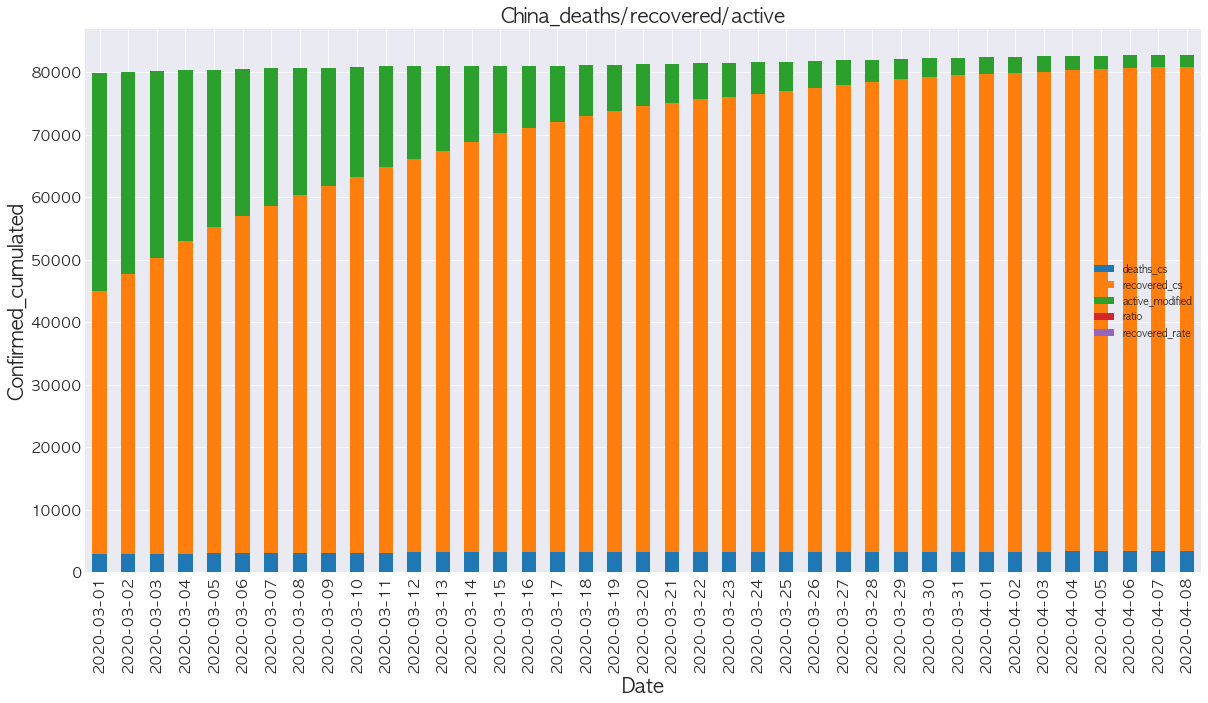

In [22]:
each('China')

### 미국

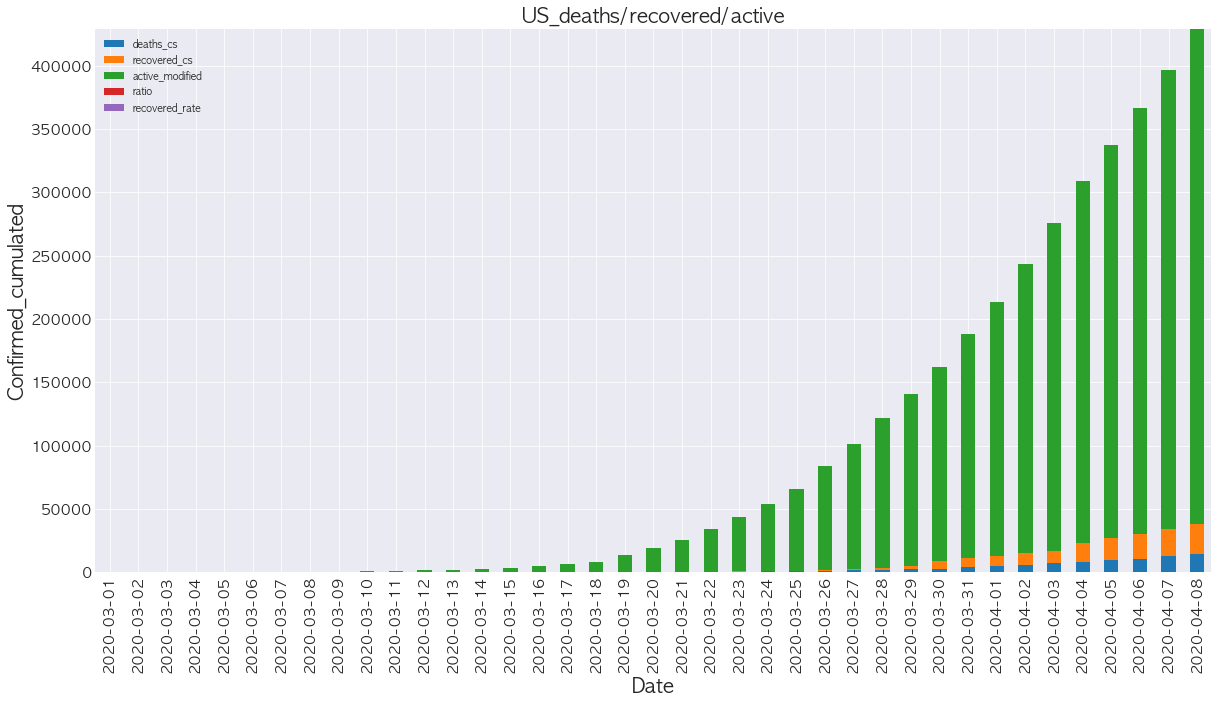

In [23]:
each('US')

### 이탈리아

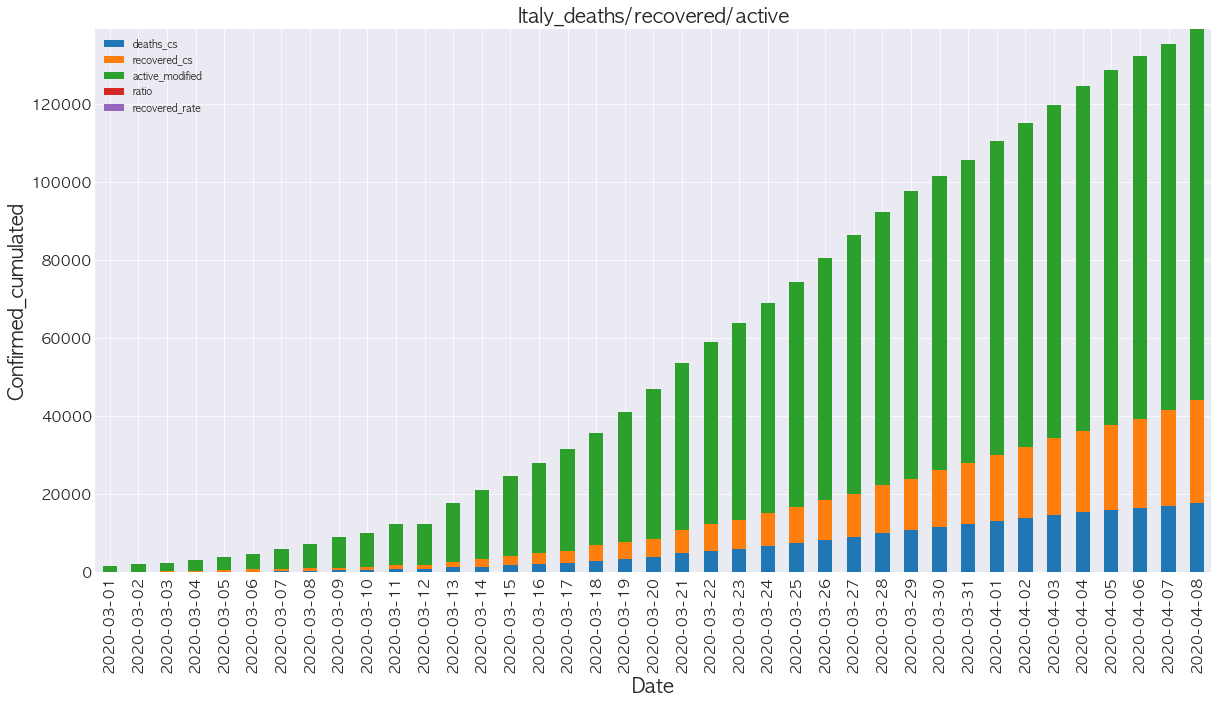

In [24]:
each('Italy')

### 한국

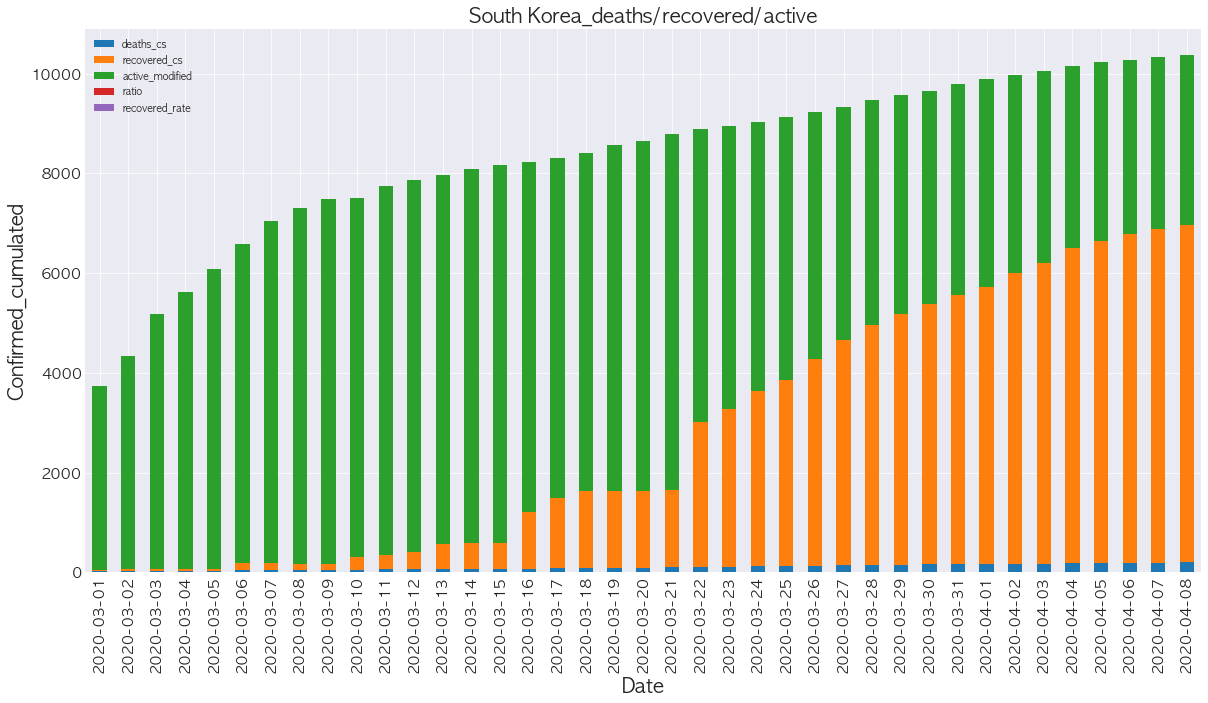

In [25]:
each('South Korea')

# 나라별 비교

## 1) 확진자 추이

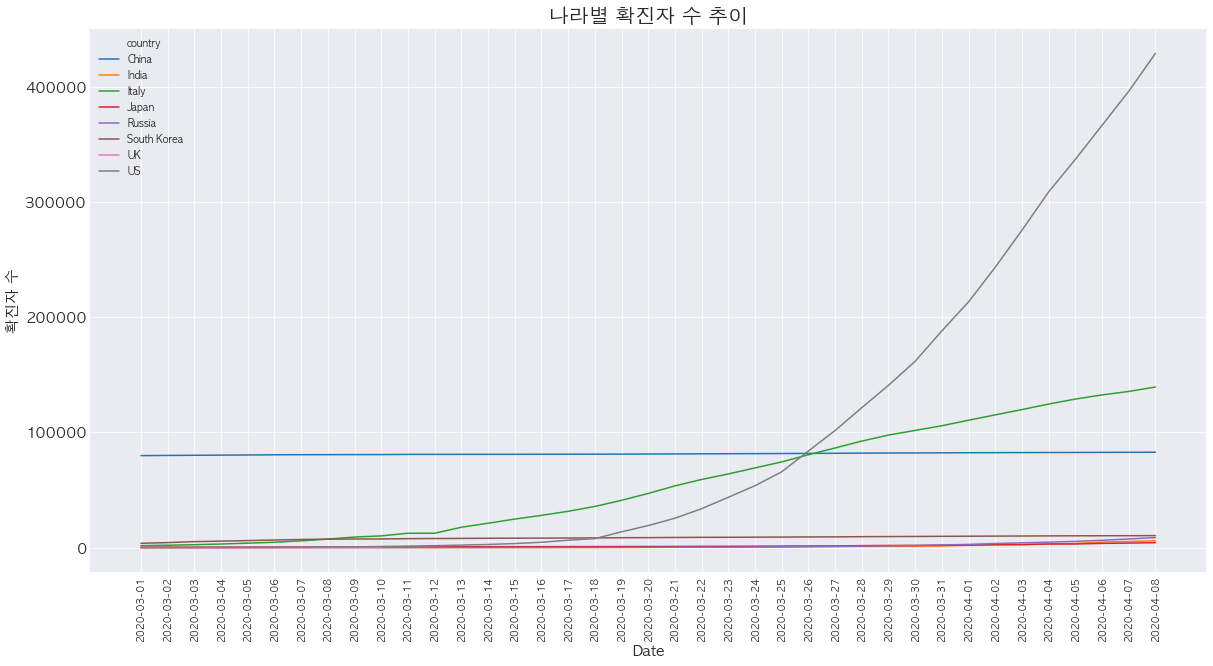

In [26]:
plt.figure(figsize=(20,10))
sns.lineplot(x='date', y='confirmed_cs',hue='country', data=df)

plt.ylabel('확진자 수',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.xticks(rotation=90) # x축에 종류가 많으면 label 돌려주기
plt.yticks(fontsize=15)
plt.title('나라별 확진자 수 추이', fontsize= 20)
fig = plt.gcf()
plt.show()
fig.savefig('나라별 확진자 추이.png')

In [13]:
df.head()

,country,date,confirmed_cs,deaths_cs,recovered_cs,active_modified
0,China,2020-03-01,79826,2870,42118,34838
1,China,2020-03-02,80026,2912,44810,32304
2,China,2020-03-03,80151,2945,47404,29802
3,China,2020-03-04,80271,2981,49955,27335
4,China,2020-03-05,80422,3013,52240,25169


In [14]:
#확진자 비율
def ratio(row):
    if row['country']=='China':
        return row['confirmed_cs']/1406747740
    elif row['country']=='India':
        return row['confirmed_cs']/1360657785
    elif row['country']=='US':
        return row['confirmed_cs']/329479633
    elif row['country']=='Russia':
        return row['confirmed_cs']/146748600
    elif row['country']=='Japan':
        return row['confirmed_cs']/125950000
    elif row['country']=='UK':
        return row['confirmed_cs']/66830229       
    elif row['country']=='Italy':
        return row['confirmed_cs']/59575231
    elif row['country']=='South Korea':
        return row['confirmed_cs']/51780579

In [15]:
df['ratio']=np.nan
df['ratio']=df.apply(lambda row: ratio(row), axis=1)
df['ratio']=df['ratio']*100

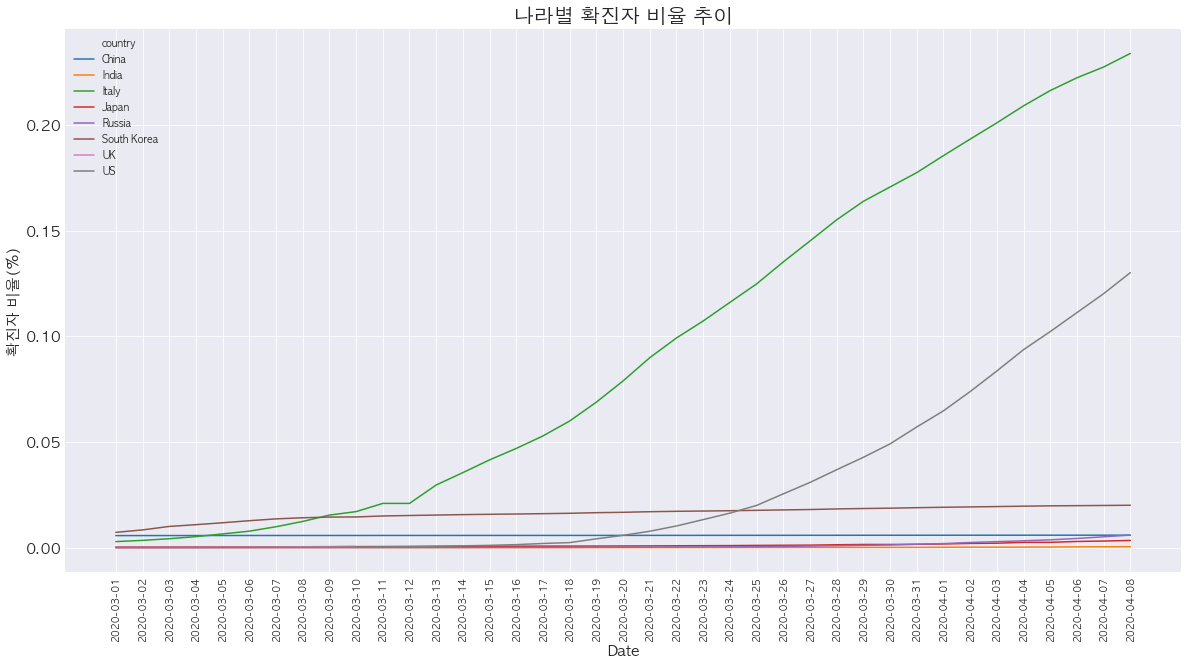

In [27]:
plt.figure(figsize=(20,10))
sns.lineplot(x='date', y='ratio',hue='country', data=df)

plt.ylabel('확진자 비율(%)',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.xticks(rotation=90) # x축에 종류가 많으면 label 돌려주기
plt.yticks(fontsize=15)
plt.title('나라별 확진자 비율 추이', fontsize= 20)
fig = plt.gcf()
plt.show()
fig.savefig('나라별 확진자 비율 추이.png')

## 2) 완치자 비율

In [17]:
#확진자 중, recovered의 비율
df['recovered_rate']=df['recovered_cs']/df['confirmed_cs']

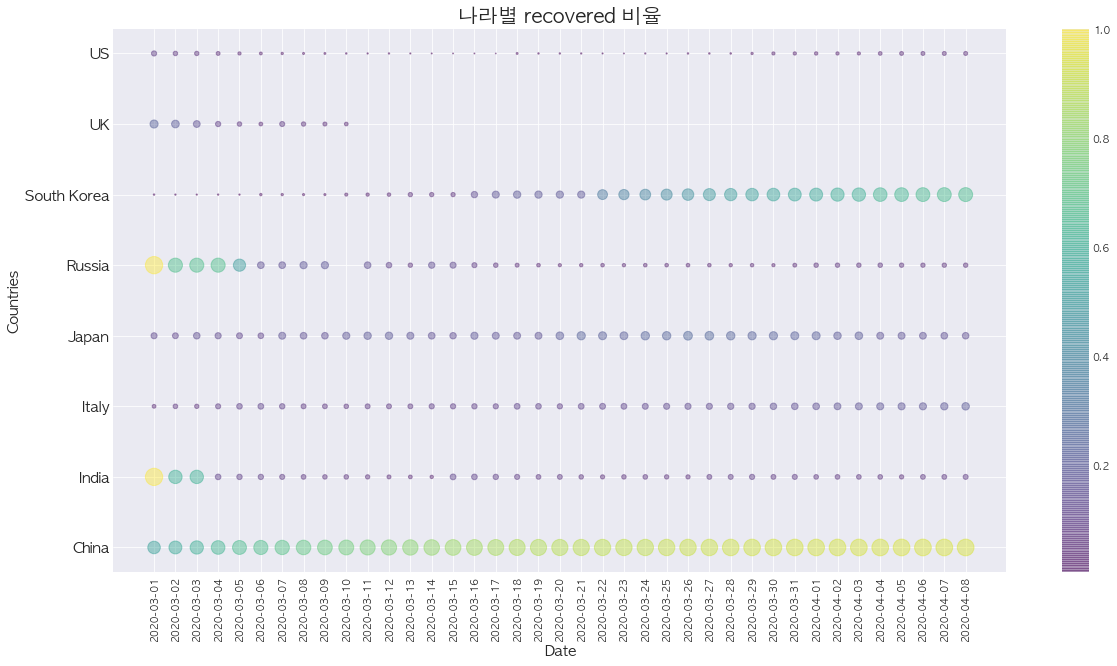

In [20]:
plt.figure(figsize=(20,10))
plt.scatter(df['date'], # x축
            df['country'], # y축
            c=df['recovered_rate'], # 색상
            s=300*df['recovered_rate'], # 사이즈 
            # 10을 곱해본 이유는 그래프 사이즈에 맞게 원의 지름을 키워주기 위함
            alpha=0.4, # 투명도
            cmap='viridis') # 컬러바 종류
plt.colorbar()
plt.ylabel('Countries',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.xticks(rotation=90) # x축에 종류가 많으면 label 돌려주기
plt.yticks(fontsize=15)
plt.title('나라별 recovered 비율', fontsize= 20)
fig = plt.gcf()
plt.show()
fig.savefig('나라별 recovered 비율.png')